In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
df.shape

(205, 26)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
Company_Name = df["CarName"].apply(lambda x: x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=["CarName"],inplace=True)

In [11]:
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

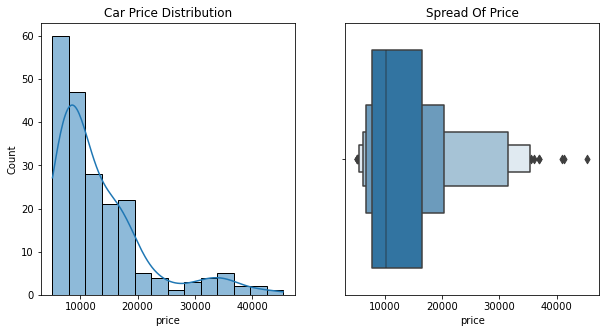

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Car Price Distribution")
sns.histplot(data=df,x="price",kde=True)

plt.subplot(1,2,2)
plt.title("Spread Of Price")
sns.boxenplot(data=df,x="price")
plt.show()

We can clearly observe that our Car Price  is Right Skewed.

few of the car's price is above 14000.

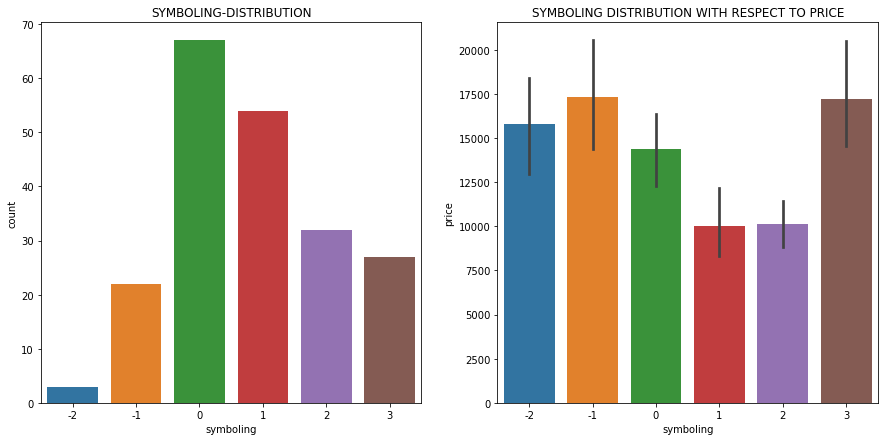

In [13]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("SYMBOLING-DISTRIBUTION")
sns.countplot(df["symboling"],data=df)

plt.subplot(1,2,2)
plt.title("SYMBOLING DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df["symboling"],df["price"],data=df);
plt.show()

Most of the car has zero symboling

-3 and 1 is the highest the price of car have ["SYMBOLING DISTRIBUTION WITH RESPECT TO PRICE"]

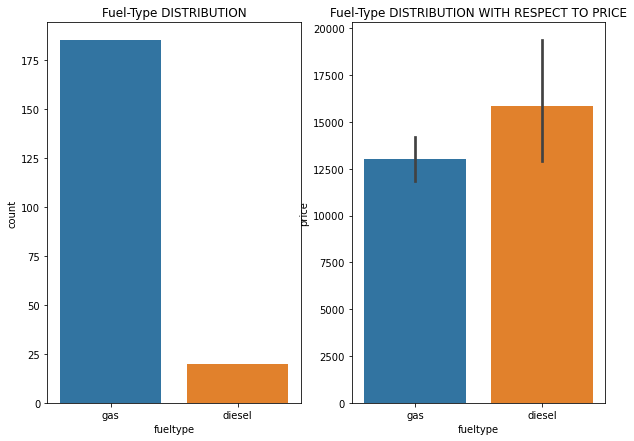

In [14]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Fuel-Type DISTRIBUTION")
sns.countplot(df['fueltype'],data=df)

plt.subplot(1,2,2)
plt.title("Fuel-Type DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['fueltype'],df['price'],data=df);

Diesel is the higher price as compared to Gas 

That's why the Gas usage is much more then Diesel.

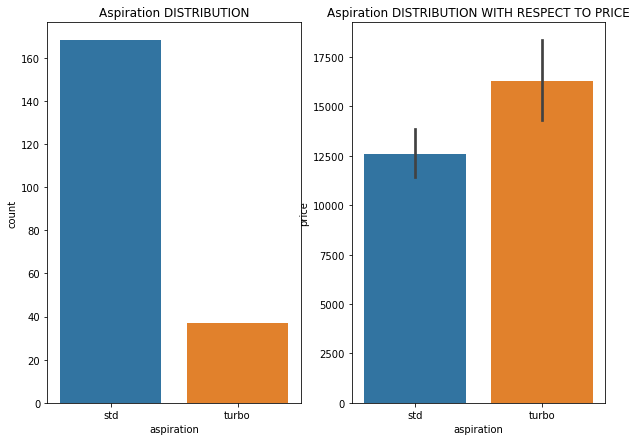

In [15]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Aspiration DISTRIBUTION")
sns.countplot(df['aspiration'],data=df)

plt.subplot(1,2,2)
plt.title("Aspiration DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['aspiration'],df['price'],data=df);

Turbo price is Higher 

But usage of Std is more

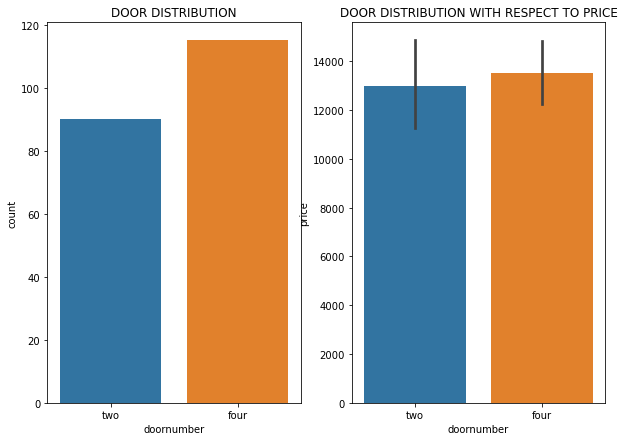

In [16]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("DOOR DISTRIBUTION")
sns.countplot(df['doornumber'],data=df)

plt.subplot(1,2,2)
plt.title("DOOR DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['doornumber'],df['price'],data=df);

2-Door's car is less as comapred to 4-Door but the price difference between is very less but 4-door's car takes led in both

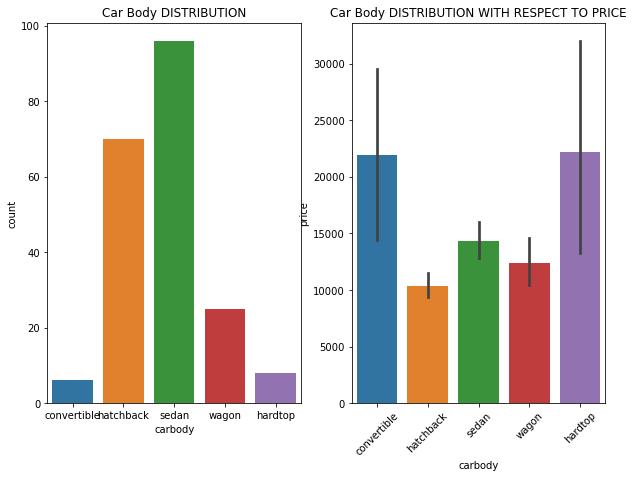

In [17]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.title("Car Body DISTRIBUTION")
sns.countplot(df['carbody'],data=df)

plt.subplot(1,2,2)
plt.title("Car Body DISTRIBUTION WITH RESPECT TO PRICE")
sns.barplot(df['carbody'],df['price'],data=df);
plt.xticks(rotation=45)
plt.show()

Sedan carbody has the highest no of Distribution

The price of convertible and Hardtop is Equal and Higher

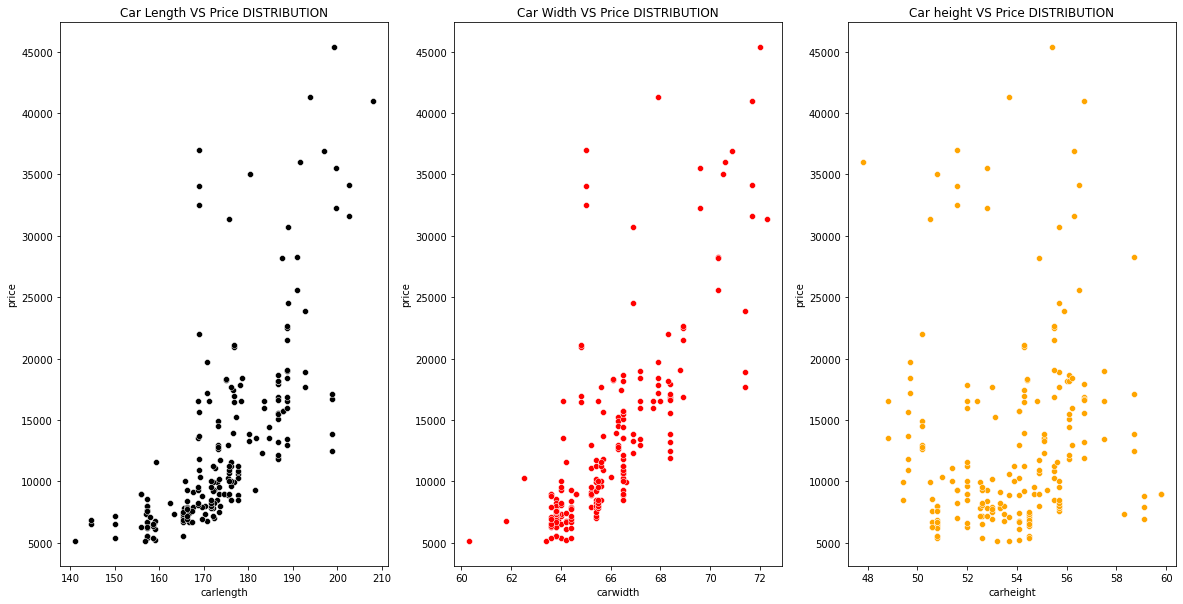

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Car Length VS Price DISTRIBUTION")
sns.scatterplot(df['carlength'],df['price'],color="black",data=df)

plt.subplot(1,3,2)
plt.title("Car Width VS Price DISTRIBUTION")
sns.scatterplot(df['carwidth'],df['price'],color="red",data=df);

plt.subplot(1,3,3)
plt.title("Car height VS Price DISTRIBUTION")
sns.scatterplot(df['carheight'],df['price'],color='orange',data=df);

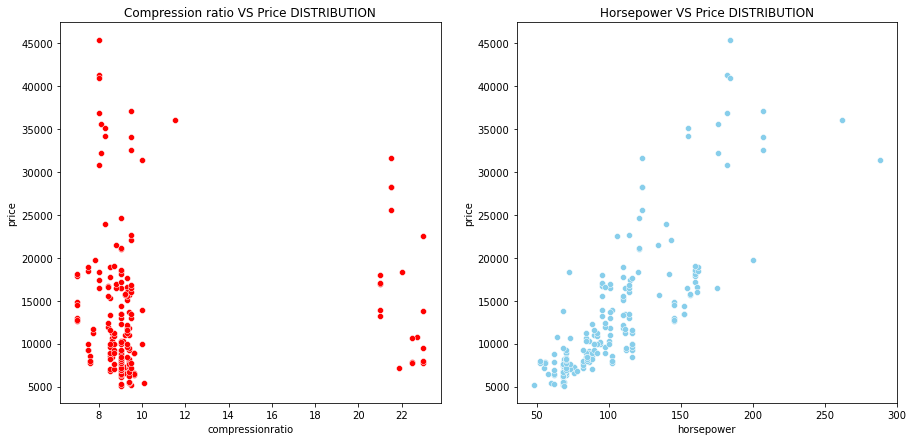

In [19]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.title("Compression ratio VS Price DISTRIBUTION")
sns.scatterplot(df['compressionratio'],df['price'],color='red',data=df);

plt.subplot(1,2,2)
plt.title("Horsepower VS Price DISTRIBUTION")
sns.scatterplot(df['horsepower'],df['price'],color='skyblue',data=df);

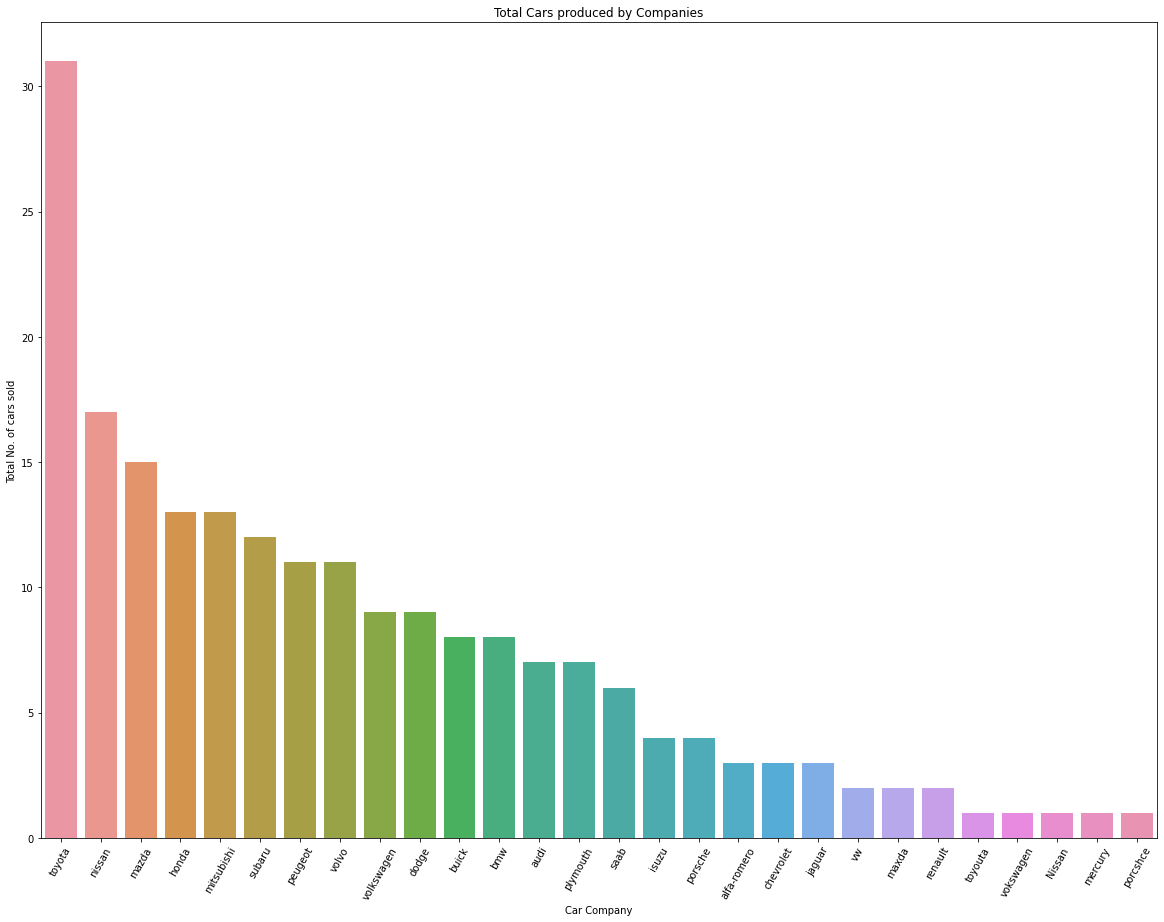

In [20]:
plt.figure(figsize=(20,15))
sns.barplot(df["CompanyName"].value_counts().keys(),df["CompanyName"].value_counts().values)
plt.xlabel("Car Company")
plt.ylabel("Total No. of cars sold")
plt.title("Total Cars produced by Companies")
plt.xticks(rotation=60);
plt.show()

Toyota has the highest no.of cars sold with the almost 2X from 2nd no car company 


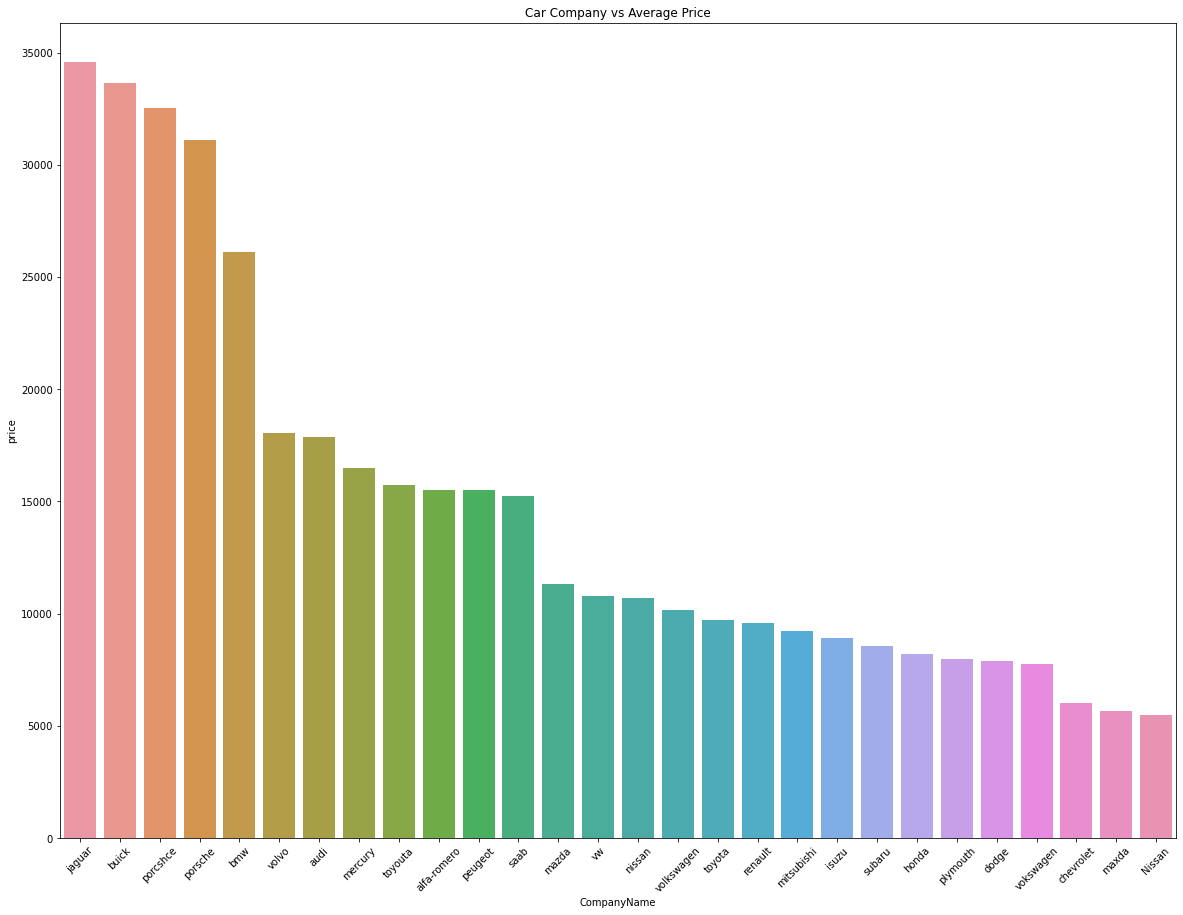

In [21]:
plt.figure(figsize=(20,15))
x=pd.DataFrame(df.groupby("CompanyName")["price"].mean().sort_values(ascending=False))
sns.barplot(x.index,x["price"]) 
plt.xticks(rotation=45)
plt.title("Car Company vs Average Price")
plt.show()

Jaguar and Buick has the Highest car range price 

# MACHINE-LEARNING

In [22]:
#pip install catboost

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [24]:
df1 = df[['fueltype','aspiration','doornumber','carbody','drivewheel','enginetype','cylindernumber','fuelsystem'
             ,'wheelbase','carlength','carwidth','curbweight','enginesize','boreratio','horsepower','citympg','highwaympg',
             'price']]

In [25]:
df1 = pd.get_dummies(columns=["fueltype","aspiration","doornumber","carbody","drivewheel","enginetype",
                                "cylindernumber","fuelsystem"],data=df1)

In [26]:
df1.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,price,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,88.6,168.8,64.1,2548,130,3.47,111,21,27,13495.0,...,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,2548,130,3.47,111,21,27,16500.0,...,0,0,0,0,0,0,0,1,0,0
2,94.5,171.2,65.5,2823,152,2.68,154,19,26,16500.0,...,0,0,0,0,0,0,0,1,0,0
3,99.8,176.6,66.2,2337,109,3.19,102,24,30,13950.0,...,0,0,0,0,0,0,0,1,0,0
4,99.4,176.6,66.4,2824,136,3.19,115,18,22,17450.0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
x=df1.drop(columns=["price"])
y=df1["price"]

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
x_train

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
66,104.9,175.0,66.1,2700,134,3.43,72,31,39,1,...,0,0,0,0,0,1,0,0,0,0
111,107.9,186.7,68.4,3075,120,3.46,95,19,24,0,...,0,0,0,0,0,0,0,1,0,0
153,95.7,169.7,63.6,2280,92,3.05,62,31,37,0,...,0,0,0,1,0,0,0,0,0,0
96,94.5,165.3,63.8,1971,97,3.15,69,31,37,0,...,0,0,0,1,0,0,0,0,0,0
38,96.5,167.5,65.2,2289,110,3.15,86,27,33,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,99.2,178.5,67.9,3139,181,3.43,160,19,25,0,...,0,0,0,0,0,0,0,1,0,0
14,103.5,189.0,66.9,3055,164,3.31,121,20,25,0,...,0,0,0,0,0,0,0,1,0,0
92,94.5,165.3,63.8,1938,97,3.15,69,31,37,0,...,0,0,0,1,0,0,0,0,0,0
179,102.9,183.5,67.7,3016,171,3.27,161,19,24,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
x_test

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,citympg,highwaympg,fueltype_diesel,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
15,103.5,189.0,66.9,3230,209,3.62,182,16,22,0,...,0,0,0,0,0,0,0,1,0,0
9,99.5,178.2,67.9,3053,131,3.13,160,16,22,0,...,0,0,0,0,0,0,0,1,0,0
100,97.2,173.4,65.2,2302,120,3.33,97,27,34,0,...,0,0,0,1,0,0,0,0,0,0
132,99.1,186.6,66.5,2658,121,3.54,110,21,28,0,...,0,0,0,0,0,0,0,1,0,0
68,110.0,190.9,70.3,3750,183,3.58,123,22,25,1,...,0,0,0,0,0,1,0,0,0,0
95,94.5,165.6,63.8,2028,97,3.15,69,31,37,0,...,0,0,0,1,0,0,0,0,0,0
159,95.7,166.3,64.4,2275,110,3.27,56,38,47,1,...,0,0,0,0,0,1,0,0,0,0
162,95.7,166.3,64.4,2140,98,3.19,70,28,34,0,...,0,0,0,1,0,0,0,0,0,0
147,97.0,173.5,65.4,2455,108,3.62,94,25,31,0,...,0,0,0,0,0,0,0,1,0,0
182,97.3,171.7,65.5,2261,97,3.01,52,37,46,1,...,0,0,0,0,0,1,0,0,0,0


In [31]:
y_train

66     18344.0
111    15580.0
153     6918.0
96      7499.0
38      9095.0
        ...   
106    18399.0
14     24565.0
92      6849.0
179    15998.0
102    14399.0
Name: price, Length: 164, dtype: float64

In [32]:
y_test

15     30760.000
9      17859.167
100     9549.000
132    11850.000
68     28248.000
95      7799.000
159     7788.000
162     9258.000
147    10198.000
182     7775.000
191    13295.000
164     8238.000
65     18280.000
175     9988.000
73     40960.000
152     6488.000
18      5151.000
82     12629.000
86      8189.000
143     9960.000
60      8495.000
101    13499.000
98      8249.000
30      6479.000
25      6692.000
16     41315.000
168     9639.000
195    13415.000
97      7999.000
194    12940.000
67     25552.000
120     6229.000
154     7898.000
202    21485.000
79      7689.000
69     28176.000
145    11259.000
55     10945.000
45      8916.500
84     14489.000
146     7463.000
Name: price, dtype: float64

In [33]:
training_score=[]
testing_score=[]

In [34]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)
    a = r2_score(y_train,x_train_pred)*100
    b = r2_score(y_test,x_test_pred)*100
    training_score.append(a)
    testing_score.append(b)
    
    print(f"r2_Score of {model} model on Training Data is:",a)
    print(f"r2_Score of {model} model on Testing Data is:",b)

LINER REGRESSION ()

In [35]:
model_prediction(LinearRegression())

r2_Score of LinearRegression() model on Training Data is: 92.52761715043437
r2_Score of LinearRegression() model on Testing Data is: 88.66738397403329


DECISSION TREE REGRESSOR ()

In [36]:
model_prediction(DecisionTreeRegressor())

r2_Score of DecisionTreeRegressor() model on Training Data is: 99.86537119069865
r2_Score of DecisionTreeRegressor() model on Testing Data is: 90.30263468429473


RANDOM FOREST REGRESSOR ()

In [37]:
model_prediction(RandomForestRegressor())

r2_Score of RandomForestRegressor() model on Training Data is: 98.33347786630452
r2_Score of RandomForestRegressor() model on Testing Data is: 95.4198732940548


ADABOAST REGRESSOR()

In [38]:
model_prediction(AdaBoostRegressor())

r2_Score of AdaBoostRegressor() model on Training Data is: 95.4858501001907
r2_Score of AdaBoostRegressor() model on Testing Data is: 90.81126361784315


GRADIENT BOASTING REGRESSOR()

In [39]:
model_prediction(GradientBoostingRegressor())

r2_Score of GradientBoostingRegressor() model on Training Data is: 99.27586511528148
r2_Score of GradientBoostingRegressor() model on Testing Data is: 92.05261063812765


CAT BOAST REGRESSOR()

In [40]:
model_prediction(CatBoostRegressor(verbose=False))

r2_Score of <catboost.core.CatBoostRegressor object at 0x000001A41A6BE640> model on Training Data is: 99.66964225930734
r2_Score of <catboost.core.CatBoostRegressor object at 0x000001A41A6BE640> model on Testing Data is: 94.23459506019563


XG BOAST REGRESSOR()

In [41]:
model_prediction(XGBRegressor())

r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...) model on Training Data is: 99.8652201088386
r2_Score of XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
       

# CONCLUSIONS

RANDOM FOREST MODEL AROUND 95% GIVES THE HIGHEST PERFORMANCE

CAT-BOAST AND GRADIENT-BOASTING PERFORM WELL SO WE CAN ALSO CONSIDER THAT

SO WE CAN USE ANY MODEL IN BETWEEN FOR FUTURE.